Fetching data from 

In [108]:
dataset = 'data-es'
base_url = f"https://equipements.sports.gouv.fr/api/explore/v2.1/catalog/datasets/{dataset}/records"
import requests

params = {
    'limit': 20,
    'refine': [
        'carac159:"Clubs sportifs, comités, ligues, fédérations"',
        'dep_nom:"Paris"'
        ],
}

res = requests.get(
    url=base_url,
    params=params
)
print('url : ', res.url)
print('res.headers : ', res.headers)
print('content : ', res.json())
import pandas as pd
d = dict(res.json())
data = pd.DataFrame(d['results'])

url :  https://equipements.sports.gouv.fr/api/explore/v2.1/catalog/datasets/data-es/records?limit=20&refine=carac159%3A%22Clubs+sportifs%2C+comit%C3%A9s%2C+ligues%2C+f%C3%A9d%C3%A9rations%22&refine=dep_nom%3A%22Paris%22
res.headers :  {'Server': 'openresty', 'Date': 'Mon, 29 Jan 2024 12:36:43 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'X-RateLimit-Remaining': '4822', 'X-RateLimit-Limit': '5000', 'X-RateLimit-Reset': '2024-01-30 00:00:00+00:00', 'Cache-Control': 'no-cache, no-store, max-age=0, must-revalidate', 'Vary': 'Accept-Language, Cookie, Host', 'Content-Language': 'fr-fr', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Methods': 'POST, GET, OPTIONS', 'Access-Control-Max-Age': '1000', 'Access-Control-Allow-Headers': 'Authorization, X-Requested-With, Origin, ODS-API-Analytics-App, ODS-API-Analytics-Embed-Type, ODS-API-Analytics-Embed-Referrer, ODS-Widgets-Version, Accept', 'Access-Control-Expose-He

In [109]:
from tqdm import tqdm

# import data multiple times
d = pd.DataFrame([])
list_data = []
for i in tqdm(range(20)):
    params = {
        'limit': 100,
        'refine': [
            'carac159:"Clubs sportifs, comités, ligues, fédérations"',
            'dep_nom:"Paris"'
            ],
        'offset': i*100,
    }

    res = requests.get(
        url=base_url,
        params=params
    )

    temp = pd.DataFrame((res.json())['results'])
    list_data.append(temp)

  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:06<00:00,  2.89it/s]


In [110]:
data = pd.concat(list_data).reset_index(drop=True)

C:\Users\PA\AppData\Local\Temp\ipykernel_10552\3597297232.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat(list_data).reset_index(drop=True)


In [111]:
data.columns

Index(['numinstallation', 'nominstallation', 'adresse', 'codepostal',
       'new_name', 'new_code', 'actif', 'etat', 'date_creation', 'date_etat',
       ...
       'epci_nom', 'dep_code', 'dep_nom', 'reg_code', 'reg_nom',
       'dep_code_filled', 'aca_nom', 'lib_bdv', 'code_bdv', 'coordonnees'],
      dtype='object', length=103)

In [112]:
data.carac159.value_counts()

carac159
[Clubs sportifs, comités, ligues, fédérations, Scolaires, universités, Autre - association(s) et groupes divers]                               413
[Individuel(s), famille(s), Clubs sportifs, comités, ligues, fédérations, Scolaires, universités, Autre - association(s) et groupes divers]    299
[Clubs sportifs, comités, ligues, fédérations]                                                                                                 290
[Clubs sportifs, comités, ligues, fédérations, Autre - association(s) et groupes divers]                                                       152
[Clubs sportifs, comités, ligues, fédérations, Scolaires, universités]                                                                         115
[Individuel(s), famille(s), Clubs sportifs, comités, ligues, fédérations, Autre - association(s) et groupes divers]                            110
[Individuel(s), famille(s), Clubs sportifs, comités, ligues, fédérations, Scolaires, universités]            

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1489 entries, 0 to 1488
Columns: 103 entries, numinstallation to coordonnees
dtypes: float64(16), object(87)
memory usage: 1.2+ MB


In [114]:
coords = pd.json_normalize(data.coordonnees)

In [115]:
coords

,lon,lat
0,2.339030,48.892100
1,2.398620,48.889800
2,2.398230,48.889800
3,2.378880,48.880350
4,2.396720,48.892100
...,...,...
1484,2.338550,48.899080
1485,2.338124,48.899069
1486,2.328300,48.887000
1487,2.353210,48.886400


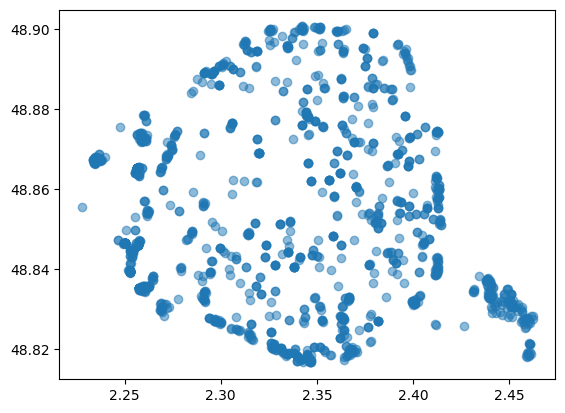

In [119]:
import matplotlib.pyplot as plt

plt.scatter(coords.lon, coords.lat, alpha=0.5)

In [117]:
import geopandas as gpd
import contextily as cx

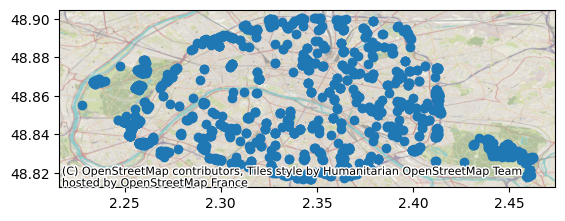

In [118]:
ax = gpd.GeoDataFrame(
    data=coords,
    geometry=gpd.points_from_xy(coords.lon, coords.lat, crs="EPSG:4326"),
    crs="EPSG:4326"
).plot()
cx.add_basemap(ax, crs="EPSG:4326", zoom=14)